In [ ]:
%pip install datasets
%pip install transformers
!pip install evaluate
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from IPython.display import Image
import random as rd
import numpy as np

In [ ]:
food101_dataset = load_dataset("food101", split="train")#
print(food101_dataset)


Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 75750
})


In [ ]:
# Step 2: Prepare the labels
#create dictionnary for labels

label2id, id2label = dict(), dict()
for i, label in enumerate(food101_dataset.features["label"].names):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [ ]:
print(id2label)
print(label2id)

{'0': 'apple_pie', '1': 'baby_back_ribs', '2': 'baklava', '3': 'beef_carpaccio', '4': 'beef_tartare', '5': 'beet_salad', '6': 'beignets', '7': 'bibimbap', '8': 'bread_pudding', '9': 'breakfast_burrito', '10': 'bruschetta', '11': 'caesar_salad', '12': 'cannoli', '13': 'caprese_salad', '14': 'carrot_cake', '15': 'ceviche', '16': 'cheesecake', '17': 'cheese_plate', '18': 'chicken_curry', '19': 'chicken_quesadilla', '20': 'chicken_wings', '21': 'chocolate_cake', '22': 'chocolate_mousse', '23': 'churros', '24': 'clam_chowder', '25': 'club_sandwich', '26': 'crab_cakes', '27': 'creme_brulee', '28': 'croque_madame', '29': 'cup_cakes', '30': 'deviled_eggs', '31': 'donuts', '32': 'dumplings', '33': 'edamame', '34': 'eggs_benedict', '35': 'escargots', '36': 'falafel', '37': 'filet_mignon', '38': 'fish_and_chips', '39': 'foie_gras', '40': 'french_fries', '41': 'french_onion_soup', '42': 'french_toast', '43': 'fried_calamari', '44': 'fried_rice', '45': 'frozen_yogurt', '46': 'garlic_bread', '47': '

In [ ]:
rd.seed(0)

random_class = rd.choices(food101_dataset.features["label"].names,k=10)
print(random_class)
labels = [int(label2id[str(k)]) for k in random_class]
print(labels)

['samosa', 'pizza', 'french_toast', 'crab_cakes', 'guacamole', 'french_fries', 'prime_rib', 'deviled_eggs', 'greek_salad', 'ice_cream']
[85, 76, 42, 26, 51, 40, 79, 30, 48, 58]


In [ ]:
image_ = []
P=np.zeros(101)
for ele in food101_dataset.shuffle(seed=42):
  if ele['label'] in labels and P[ele['label']]<5:
    P[ele['label']]+=1
    image_.append(ele)


In [ ]:
print(image_)

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E60EE0>, 'label': 58}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x7A6CC3A51F30>, 'label': 51}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E626E0>, 'label': 26}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E62C80>, 'label': 58}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x7A6CC3E607C0>, 'label': 76}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E601C0>, 'label': 40}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E62680>, 'label': 76}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x289 at 0x7A6CC3E60490>, 'label': 30}, {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E617B0>, 'label': 85}, {'image': <PIL.JpegImagePlugin.JpegI

In [ ]:
for i in range(len(image_)):
  print(i)
  print(image_[i])

0
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E60EE0>, 'label': 58}
1
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x7A6CC3A51F30>, 'label': 51}
2
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E626E0>, 'label': 26}
3
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E62C80>, 'label': 58}
4
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x512 at 0x7A6CC3E607C0>, 'label': 76}
5
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E601C0>, 'label': 40}
6
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E62680>, 'label': 76}
7
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x289 at 0x7A6CC3E60490>, 'label': 30}
8
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7A6CC3E617B0>, 'label': 85}
9
{'image': <PIL.JpegImagePl

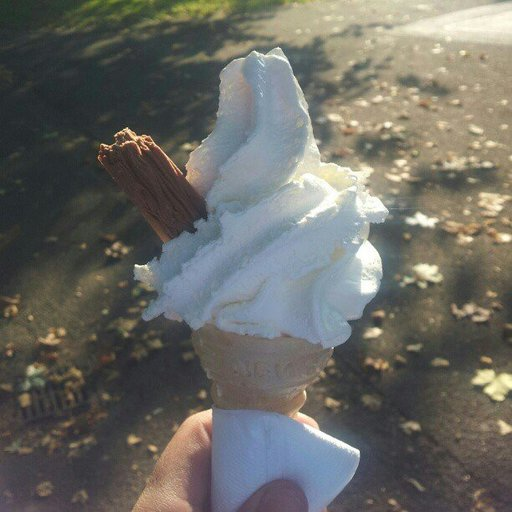

In [ ]:
image_[0
       ]['image']

In [ ]:
description = ["topping planted inside a white, creamy and fluffy ice cream inside a cone",
               "guacamole with pomegranate seed, salad, piece of tomato, sliced parsley and onion in a yellow bowl with a spoon planted inside",
               "two fried crab cakes with corn, cabbage in salad in a plat" ,
               "small chocolat cake in a cup, with biscuit topping planted inside, above tubs of ice cream with lots of different flavors",
               "two slices of a pizza with peperoni and beef meat on a wooden table",
               "plat of french fries in on side and with lemon, onion, carrot and green bean in the other side",
               "Delicious looking cheese pizza sliced in eight with another same pizza in background",
               "four deviled eggs with mayonnaise aromatic herb and small chopped onion",
               "Meat and onion samosa already eaten, with a little salad",
               "medium cooked prime rib with green bean, mashed potato",
               "fancy terrace of a restaurant during night",
               "polaroid style photo of an ice cream looking like a rose, with ice cream written in italian (Gelato) at the bottom right",
               "pizza with a thick crust sliced in eight with burrata cheese, tomato sauce and parsley",
               "guacamole a little too liquid with slice tomato, salad and olive",
               "greek salad with tomato, onion, burrata cheese",
               "plat with fried potatos with cream sauce and two crab cakes separated by long green beans",
               "classic tray of french fries",
               "dark photo of crab cakes on salad, with two sauces nexto it, one creamy, one red",
               "crab cakes cut in half looking a bit creamy inside",
               "typical english breakfast with bacon, scrambled eggs, meat and butter sample to use for the french toast",
               "creamy sauce on two crab cakes with a potato pancake and sliced carrots",
               "bowl of guacamole with sliced tomatos and onion",
               "chantilly and sugar on a french toast",
               "two tomate and cheese base pizza with ham and mushrooms",
               "Ice cream looking like a flower, with vanilla ice cream and an orange one",
               "guacamole made of sliced tomatos, onions and aromatic herbs, on nachos, with a fork nexto them",
               "half a cup of french fries from burger king",
               "one single deviled eggs with a slice of tomato, some creamy sauce and aromatic herb",
               "french toast with chantilly and caramel apples with everything mixed",
               "greek salad with tomato, onion and burrata cheese with some crackers nexto it",
               "deviled eggs with yellow sauce, upper something fried",
               "four deviled eggs with mayonnaise separate by a cauliflower",
               "three deviled eggs with sliced onions",
               "greek salad with tomatos, onions, olives, bell pepper and burrata cheese",
               "greek salad with tomatos, onions, olives and a lot of burrata cheese",
               "big homemade french fries, the salt is visible on it",
               "classic samosa under a paper bag",
               "Bowl of classic guacamole with nachos and a cocktail",
               "french fries cut differently than usual, the salt is visible on it",
               "fancy french toast with a cup of tea, with some chantilly on a flan nexto a folk and a knife",
               "delicious looking pizza with thick crust sliced in eight with cheese, tomato, olive and parsley",
               "greek salad with only olive, tomatos, onions and bell pepper",
               "scoop of white ice cream in a glass ice cream cup with a spoon in it",
               "single samosa in a plat",
               "Underdone prime rib in a plat during a party with a lot of bottles, waste of corn, empty ice cream cup",
               "medium prime rib with corn, bread, mashed potato with meat sauce, two beer bottles and a plat of tortellini pasta",
               "french toast with a bottle of alcohol and a dessert",
               "open samosa",
               "Underdone prime rib with three sauces, two creamy on looking like BBQ sauce, with an open bread",
               "five samosa with salad, pickles and tomato"]
print(len(description))

50


In [ ]:
len(image_)

50

In [ ]:
final_json = []
for i in range(len(image_)):
  final_json.append({ 'name':id2label[str(image_[i]['label'])],'annotation': description[i] }) #'image':  image_[i]['image'],

In [ ]:
final_json

[{'name': 'ice_cream',
  'annotation': 'topping planted inside a white, creamy and fluffy ice cream inside a cone'},
 {'name': 'guacamole',
  'annotation': 'guacamole with pomegranate seed, salad, piece of tomato, sliced parsley and onion in a yellow bowl with a spoon planted inside'},
 {'name': 'crab_cakes',
  'annotation': 'two fried crab cakes with corn, cabbage in salad in a plat'},
 {'name': 'ice_cream',
  'annotation': 'small chocolat cake in a cup, with biscuit topping planted inside, above tubs of ice cream with lots of different flavors'},
 {'name': 'pizza',
  'annotation': 'two slices of a pizza with peperoni and beef meat on a wooden table'},
 {'name': 'french_fries',
  'annotation': 'plat of french fries in on side and with lemon, onion, carrot and green bean in the other side'},
 {'name': 'pizza',
  'annotation': 'Delicious looking cheese pizza sliced in eight with another same pizza in background'},
 {'name': 'deviled_eggs',
  'annotation': 'four deviled eggs with mayonna

In [ ]:
import os
import json
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/My Folder"

with open("/content/drive/My Drive/My Folder/final_json.json", 'w') as file:
    json.dump(final_json, file, indent=2)

Mounted at /content/drive


______________________________________________________________________ Only before this line ______________________________________________________

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
# @title Default title text
import numpy as np

def compute_metrics(eval_pred):

    predictions, labels = eval_pred

    predictions = np.argmax(predictions, axis=1)

    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import torch
import accelerate


food101_dataset = load_dataset("food101", split="train")#[:5000]
print(len(food101_dataset))
food101_dataset = food101_dataset.train_test_split(test_size=0.2)


labels_train = food101_dataset["train"].features["label"].names
labels_test = food101_dataset["test"].features["label"].names

# Step 2: Prepare the labels
#create dictionnary for labels

label2id, id2label = dict(), dict()
for i, label in enumerate(labels_train):
    label2id[label] = str(i)
    id2label[str(i)] = label

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=len(food101_dataset["train"].features["label"].names))



# Load the tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_labels(batch):
    words = [id2label[str(k)] for k in batch['label']]
    return tokenizer(words, padding=True, truncation=True, return_tensors="pt")

# Apply the tokenization to the training and testing sets
tokenized_food_train = food101_dataset["train"].map(tokenize_labels, batched=True)
tokenized_food_test = food101_dataset["test"].map(tokenize_labels, batched=True)
# Tokenize the labels
# Step 4: Prepare for training
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    warmup_ratio=0.1,
    logging_steps=10,
    metric_for_best_model="accuracy",

    #weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,

    train_dataset=tokenized_food_train,
    eval_dataset=tokenized_food_test,

    compute_metrics=compute_metrics,

)

trainer.train()


Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

75750


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/60600 [00:00<?, ? examples/s]

Map:   0%|          | 0/15150 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,0.005900,0.002862,1.000000
